In [71]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import PIL.Image as pilimg
import cv2

In [2]:
train_df=pd.read_csv('C:\\python_DA\\data\\digit-recognizer\\train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_data=pd.get_dummies(train_df['label']) 
y_data.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [4]:
train_df.drop('label', axis=1, inplace=True)
train_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
split_num=int(train_df.shape[0]*.8)  # 33600
scaler=MinMaxScaler()

x_data=scaler.fit_transform(train_df)

train_x_data=x_data[:split_num]
test_x_data=x_data[split_num:]

train_y_data=y_data[:split_num]
test_y_data=y_data[split_num:]


In [6]:
X=tf.placeholder(shape=[None,784], dtype=tf.float32)
Y=tf.placeholder(shape=[None,10], dtype=tf.float32)

W=tf.Variable(tf.random_normal([784,10]), name='weight')
b=tf.Variable(tf.random_normal([10]), name='bias')

logit=tf.matmul(X,W)+b
H=tf.nn.softmax(logit)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                               labels=Y))

train=tf.train.GradientDescentOptimizer(learning_rate=.5).minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [7]:
train_epoch=50
batch_size=100
cnt=0

for step in range(train_epoch):
    num_of_iter=len(train_x_data)//batch_size
    
    for i in range(num_of_iter):
        batch_x=train_x_data[batch_size*i:batch_size*(i+1)]
        batch_y=train_y_data[batch_size*i:batch_size*(i+1)]
        
        _, cost_val=sess.run([train, cost],
                             feed_dict={
                                 X: batch_x,
                                 Y: batch_y
                             })
    if step%10==0:
        cnt+=1
        print(f'cost value{cnt}: {cost_val}')
        
predict=tf.argmax(H, axis=1)
correct=tf.equal(predict, tf.argmax(Y, axis=1))
accuracy=tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(f'Accuracy: {sess.run(accuracy, feed_dict= {X:train_x_data, Y:train_y_data})}')


cost value1: 0.8508026003837585
cost value2: 0.6239917874336243
cost value3: 0.5563745498657227
cost value4: 0.5081710815429688
cost value5: 0.4747799336910248
Accuracy: 0.9311606884002686


Row: 1196
Label: [0]
Predict: [0]


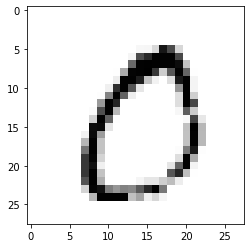

In [8]:
r=np.random.randint(0, test_x_data.shape[0])
label=sess.run(tf.argmax(test_y_data[r:r+1], axis=1))

print(f'Row: {r}')
print(f'Label: {label}')
print(f'Predict: {sess.run(tf.argmax(H,1), feed_dict={X:test_x_data[r:r+1]})}')

plt.imshow(test_x_data[r:r+1].reshape(28,28), cmap='Greys')

In [9]:
test_df=pd.read_csv('C:\\python_DA\\data\\digit-recognizer\\test.csv')
test_df.shape

(28000, 784)

In [10]:
y_data=scaler.fit_transform(test_df)
y_data[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
result=tf.cast(sess.run(H>.5, feed_dict={X:y_data}), dtype=tf.int32)
result=sess.run(tf.argmax(result,1))
result.shape

(28000,)

In [12]:
result_df=[]
for i in range(len(result)):
    result_df.append([i+1, result[i]])
    
result_df=pd.DataFrame(result_df,
                       columns=['ImageId','Label'])



In [17]:
result_df[0:50]

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [18]:
# result_df.to_csv('./data/digit-recognizer/result_df.csv',
#                  sep=',',
#                  index = False) # do not write index

In [91]:
### img->pixel
im=pilimg.open('./data/digit-recognizer/9.png').convert('L')
im=im.resize((28,28))

pix=np.array(im)
# plt.imshow(pix)

print(pix.size)

f_pix=255-pix
# plt.imshow(f_pix, cmap='Greys')

f_pix=f_pix.reshape(1,-1)

final_data=scaler.transform(f_pix)

result=sess.run(tf.argmax(H,1), feed_dict={X:pre_im})

print(f'Predict: {result}')


784
Predict: [3]
